# 1. Linear Classifier

### 2-1. Linear Classifier (3 class)

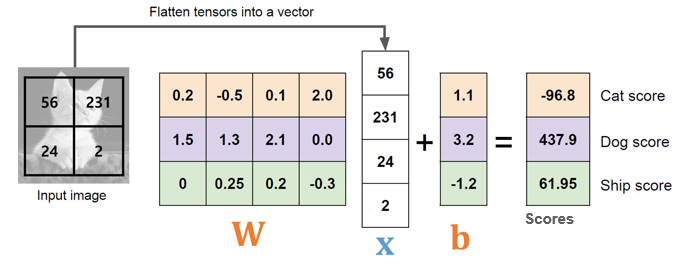

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter setting
num_size = 4
num_class = 3

In [3]:
num_sample = 1

# y = Wx + b
x = np.random.randint(255, size = (num_size, num_sample)) # Input (size 4 x 1)
W = np.random.normal(0, 1, size = (num_class, num_size)) # Weights (size 3 x 4)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 3 x 1)

s = np.dot(W, x) + b # Score (size 3x1)

In [4]:
print(x, '<-- x')
print(W, '<-- W')
print(b, '<-- b')
print(s, '<-- s')

[[90]
 [23]
 [66]
 [59]] <-- x
[[ 0.15630885  1.02377212  0.3011011   1.87281169]
 [-0.37078346 -0.22359114 -0.23619497  0.69832674]
 [ 1.64193763  0.56593996 -0.17229019  2.14571062]] <-- W
[[-1.60025668]
 [-1.24268717]
 [ 0.7343977 ]] <-- b
[[166.3828604 ]
 [-14.1433854 ]
 [276.75117736]] <-- s


### 2.2. 2D image case 
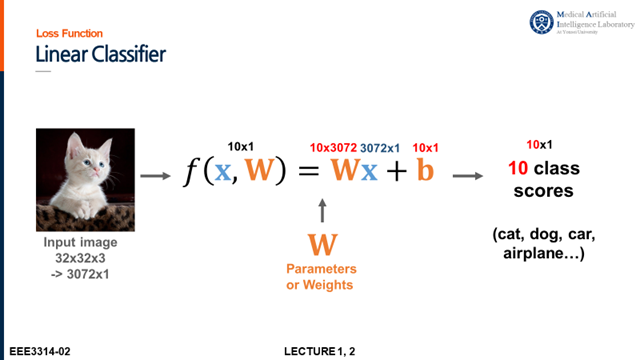

image shape: (32, 32, 3)


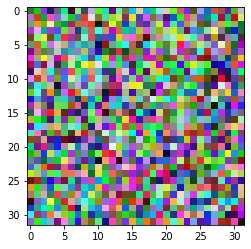

In [5]:
# parameter setting

img_shape = [32, 32, 3]
img_size = img_shape[0]*img_shape[1]*img_shape[2]
num_class = 10

x_image = np.random.randint(255, size = img_shape) # Input (size 32 x 32 x 3)

print('image shape:', x_image.shape)
plt.imshow(x_image)
plt.show()

In [6]:
# 1 sample case
num_sample = 1

# y = Wx + b
x = np.reshape(x_image, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1, size = (num_class, img_size)) # Weights (size 10 x 3072)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [7]:
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

x shape is : (3072, 1)
W shape is : (10, 3072)
b shape is : (10, 1)
s shape is : (10, 1)


#### 2.3 Multi-sample case

In [8]:
# parameter setting

num_size = 4
num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 1, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [9]:
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

x shape is : (3072, 1000)
W shape is : (10, 3072)
b shape is : (10, 1000)
s shape is : (10, 1000)


## Assignment 1-1
동영상 데이터에 대한 Linear classifier를 구현해보세요

- Input data : 32 x 32 size, RGB channel, 100 frame
- the number of samples : 500

**Input data, weights, bias, score 가 출력될 수 있도록 구현해주세요**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [ ]:
# parameter setting
num_class = 10  # the number of class : 10
num_sample = 500 # the number of samples : 500
data_shape = [32, 32, 3, 100, num_sample] # img row x img column x img channel x num frame x num sample  ... 5D shape 
video_size = data_shape[0]*data_shape[1]*data_shape[2]*data_shape[3] # 307200

x_data = np.random.randint(255, size = data_shape)  # Input data ... for 500 samples

x = np.reshape(x_data, (-1, num_sample)) # Input (size 307200 x 500) --> (video_size x sample)
W = np.random.normal(0, 1, size = (num_class, video_size)) # Weights (size 10 x 307200) --> (class x video_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 500) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 500)  --> (class x num_sample)

# check shapes of parameters (input, weights, bias, score)
print('x shape is :', x.shape) # input
print('W shape is :', W.shape) # weights
print('b shape is :', b.shape) # bias
print('s shape is :', s.shape) # score


x shape is : (307200, 500)
W shape is : (10, 307200)
b shape is : (10, 500)
s shape is : (10, 500)


#2. Loss Function 


#### 2.1 Softmax loss
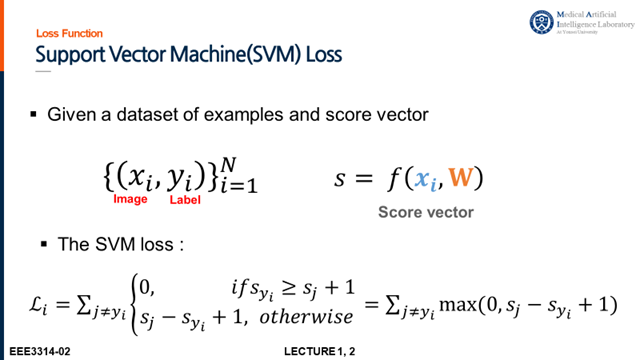

In [10]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

In [11]:
import numpy as np
import matplotlib.pyplot as plt

num_size = 4
num_class = 3
num_sample = 1

# y = Wx + b

x = np.random.randint(255, size = (num_size, num_sample)) # Input (size 4 x 1)
W = np.random.normal(0, 1, size = (num_class, num_size))/50 # Weights (size 3 x 4)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 3 x 1)

s = np.dot(W, x) + b # Score (size 3x1)

In [12]:
y = np.array([1, 0, 0])[..., np.newaxis] # label
print(s, '<-- score')
print(y, '<-- label')

[[-1.21343717]
 [-0.08620511]
 [ 4.00317507]] <-- score
[[1]
 [0]
 [0]] <-- label


In [13]:
def Loss_SVM(s, y):
    delta = 1.0
    [num_class, num_sample] = s.shape
    Li = 0
    for i in range(num_sample):
        ysample = y[:,i]
        ssample = s[:,i]
        ysample_index = np.where(ysample==1)[0][0]
        for j in range(num_class):
            if j == ysample_index:
                continue
            else:
                Li += max(0, ssample[j] - ssample[ysample_index] + delta)
    return Li / num_sample

In [14]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss)

SVM loss : 8.343844298358295


#### 2.2 image case

image shape: (32, 32, 3)


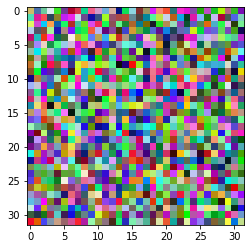

In [15]:
# 1 sample image case

img_shape = [32, 32, 3]
img_size = img_shape[0]*img_shape[1]*img_shape[2]
num_class = 10

x_image = np.random.randint(255, size = img_shape) # Input (size 32 x 32 x 3)

print('image shape:', x_image.shape)
plt.imshow(x_image)
plt.show()

num_sample = 1

# y = Wx + b

x = np.reshape(x_image, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1e-3, size = (num_class, img_size)) # Weights (size 10 x 3072)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [16]:
y = np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])[..., np.newaxis] # label
print(s, '<-- score')
print(y, '<-- label')

[[  8.21806248]
 [  8.22794474]
 [ -5.47006075]
 [ -0.99588719]
 [ -3.30215391]
 [ -6.17757699]
 [ -4.30317946]
 [ -6.80063167]
 [ 10.35159313]
 [-11.63805737]] <-- score
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]] <-- label


In [17]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss)

SVM loss : 57.30922804444477


#### 2.3 Sanity Check

In [18]:
# 1 sample image case

img_shape = [32, 32, 3]
img_size = img_shape[0]*img_shape[1]*img_shape[2]
num_class = 10

x_image = np.random.randint(255, size = img_shape) # Input (size 32 x 32 x 3)

num_sample = 1

# y = Wx + b

x = np.reshape(x_image, (-1, 1)) #  x = x_image.flatten()[..., np.newaxis]
W = np.random.normal(0, 1e-8, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1e-8, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [19]:
y = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])[..., np.newaxis] # label
print(s, '<-- score')
print(y, '<-- label')

[[ 1.36895963e-04]
 [ 6.57856550e-05]
 [-6.89433718e-05]
 [ 8.19299725e-05]
 [-1.22434064e-04]
 [-2.07501263e-05]
 [-8.73991908e-05]
 [ 1.88119894e-05]
 [ 1.86869755e-05]
 [-1.64850231e-04]] <-- score
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]] <-- label


In [20]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss) # Class - 1

SVM loss : 8.999669613678284


#### 2.4 Multi-sample *case*

In [21]:
# parameter setting

num_size = 4
num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 1, size = (num_class, img_size))/1000 # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [22]:
print('x shape is :', x.shape)
print('W shape is :', W.shape)
print('b shape is :', b.shape)
print('s shape is :', s.shape)

x shape is : (3072, 1000)
W shape is : (10, 3072)
b shape is : (10, 1000)
s shape is : (10, 1000)


In [23]:
y = np.zeros(s.shape)
y_index = np.random.randint(10, size = num_sample) 

for idx in range(num_sample):
    y[y_index[idx], idx] = 1  

In [24]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss) 

SVM loss : 43.947214298442695


In [25]:
# Sanity Check

num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 1e-8, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1e-8, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [26]:
loss = Loss_SVM(s, y)
print('SVM loss :', loss) # Class - 1

SVM loss : 9.000020280877958


#### 2.5 Regularization

In [30]:
def Loss_reg(W, dim=2):
    if dim == 1: # L1 regularization:
        reg = np.sum(abs(W))
    elif dim == 2:
        print('assignment')

    return reg

In [31]:
# parameter setting

num_class = 10
num_sample = 1000 # multi-sample
data_shape = [32, 32, 3, num_sample] # img row x img column x img channel x num sample
img_size = data_shape[0]*data_shape[1]*data_shape[2] # 3072

x_data = np.random.randint(255, size = data_shape) 

x = np.reshape(x_data, (-1, num_sample)) # Input (size 3072 x 1000) --> (image_size x sample)
W = np.random.normal(0, 0.001, size = (num_class, img_size)) # Weights (size 10 x 3072) --> (class x image_size)
b = np.random.normal(0, 1, size = (num_class, num_sample)) # bias (size 10 x 1000) --> (class x sample)

s = np.dot(W, x) + b # Score (size 10 x 1)

In [32]:
loss_term = Loss_SVM(s, y)
reg_term_r1 = Loss_reg(W, dim=1)
print('loss_term :', loss_term) 
print('r1_regularization :', reg_term_r1) 
print('total loss :', loss_term + reg_term_r1)

loss_term : 49.72493100010056
r1_regularization : 24.33915057720973
total loss : 74.06408157731029


##Assignment 1-2

1) L2 Regularization을 구현해보세요 (아래 Loss_reg 함수 참조)

- 코드만 구현하면 됩니다


2) 주어진 MNIST dataset을 이용하여 SVM loss와 Regularization loss를 구해보세요

- SVM loss와 L1, L2 Regularization loss를 모두 출력해 주세요

3) Total loss 구해보세요 (lambda = 0.1)

- lambda값을 0.1로 설정하여 total loss를 모두 출력해주세요

In [ ]:
# SVM Loss 

def Loss_SVM(s, y):
    delta = 1.0 # bias
    [num_class, num_sample] = s.shape
    Li = 0
    for i in range(num_sample):
        ysample = y[:,i] # 특정 sample의 label
        ssample = s[:,i] # 특정 sample의 score
        ysample_index = np.where(ysample==1)[0][0] # true label의 index
        for j in range(num_class):
            if j == ysample_index:
                continue
            else:
                Li += max(0, ssample[j] - ssample[ysample_index] + delta)
    return Li / num_sample # 모든 sample에 대한 loss 값의 평균

In [ ]:
# mnist data load

mnist = sklearn.datasets.fetch_openml('mnist_784', data_home="mnist_784")

num_sample = 5000
num_class = 10

x_data = mnist.data[:num_sample]
img_size = x_data[0].size

y_index = mnist.target[:num_sample]

y = np.zeros((num_class, num_sample))
for idx in range(num_sample):
    y[int(y_index[idx]), idx] = 1    

In [ ]:
# 1) Loss reg

def Loss_reg(W, dim=2):
    if dim == 1: # L1 regularization
        reg = np.sum(abs(W))
    elif dim == 2: # L2 regularization
        reg = np.sum(W**2)
    return reg

In [ ]:
# 2) MNIST linear classifer
# s = Wx + b
x = np.reshape(x_data, (-1, num_sample)) # Input (size 784 x 5000) --> (image_size x sample)
W = np.random.normal(0, 0.001, size = (num_class, img_size)) # Weights (size 10 x 784) --> (class x image_size)
b = np.random.normal(0, 0.1, size = (num_class, num_sample)) # bias (size 10 x 5000) --> (class x sample)

s = np.dot(W, x) + b # Score (10 x 5000) --> (class x sample)

# check shapes of parameters (input, weights, bias, score)
print('x shape is :', x.shape) # input
print('W shape is :', W.shape) # weights
print('b shape is :', b.shape) # bias
print('s shape is :', s.shape) # score
print('') 

# SVM loss and L1, L2 Regularization loss
loss_term = Loss_SVM(s, y)
reg_term_r1 = Loss_reg(W, dim=1)
reg_term_r2 = Loss_reg(W, dim=2)

print('SVM loss_term :', loss_term) 
print('r1_regularization_loss :', reg_term_r1) 
print('r2_regularization_loss :', reg_term_r2) 

x shape is : (784, 5000)
W shape is : (10, 784)
b shape is : (10, 5000)
s shape is : (10, 5000)

SVM loss_term : 17.12333386049949
r1_regularization_loss : 6.277150390490264
r2_regularization_loss : 0.00784421601247662


In [ ]:
# 3) Total Loss 

print('total loss by r1_regularization :', loss_term + 0.1*reg_term_r1)
print('total loss by r2_regularization :', loss_term + 0.1*reg_term_r2)

total loss by r1_regularization : 17.751048899548515
total loss by r2_regularization : 17.12411828210074
